In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


# Read the CSV file into a pandas DataFrame
df = pd.read_csv('load_generator_results.csv')

# Display the DataFrame to verify its correctness
df.head()

,ID,RequestType,Complexity,TimeSent,TimeReceived,Duration
0,1707686204769175061_86113,read,1,2024-02-11T21:16:44.768370011Z,2024-02-11T21:16:44.769200253Z,831.347µs
1,1707686204769913110_45013,read,1,2024-02-11T21:16:44.769295972Z,2024-02-11T21:16:44.769922206Z,627.335µs
2,1707686204770553029_95750,read,1,2024-02-11T21:16:44.769947Z,2024-02-11T21:16:44.770557569Z,611.641µs
3,1707686204771158416_57879,read,1,2024-02-11T21:16:44.770574407Z,2024-02-11T21:16:44.771161815Z,588.059µs
4,1707686204771720585_71795,read,1,2024-02-11T21:16:44.771170781Z,2024-02-11T21:16:44.771723834Z,553.582µs


In [16]:
# Data Preprocessing

# Convert TimeSent and TimeReceived to datetime
df['TimeSent'] = pd.to_datetime(df['TimeSent'])
df['TimeReceived'] = pd.to_datetime(df['TimeReceived'])

# Convert Duration to milliseconds
# Extracting duration values and units
df['DurationValue'] = df['Duration'].str.extract(r'(\d+\.?\d*)').astype(float)
df['DurationUnit'] = df['Duration'].str.extract(r'([µm]s)')

# Convert Duration to milliseconds
df['Duration'] = np.where(df['DurationUnit'] == 'µs', df['DurationValue'] * 1e-3, df['DurationValue'])

# Drop the 'DurationValue' and 'DurationUnit' columns as they're no longer needed
df.drop(['DurationValue', 'DurationUnit'], axis=1, inplace=True)

# Display the modified DataFrame
df.head()

,ID,RequestType,Complexity,TimeSent,TimeReceived,Duration
0,1707686204769175061_86113,read,1,2024-02-11 21:16:44.768370011+00:00,2024-02-11 21:16:44.769200253+00:00,0.831347
1,1707686204769913110_45013,read,1,2024-02-11 21:16:44.769295972+00:00,2024-02-11 21:16:44.769922206+00:00,0.627335
2,1707686204770553029_95750,read,1,2024-02-11 21:16:44.769947+00:00,2024-02-11 21:16:44.770557569+00:00,0.611641
3,1707686204771158416_57879,read,1,2024-02-11 21:16:44.770574407+00:00,2024-02-11 21:16:44.771161815+00:00,0.588059
4,1707686204771720585_71795,read,1,2024-02-11 21:16:44.771170781+00:00,2024-02-11 21:16:44.771723834+00:00,0.553582


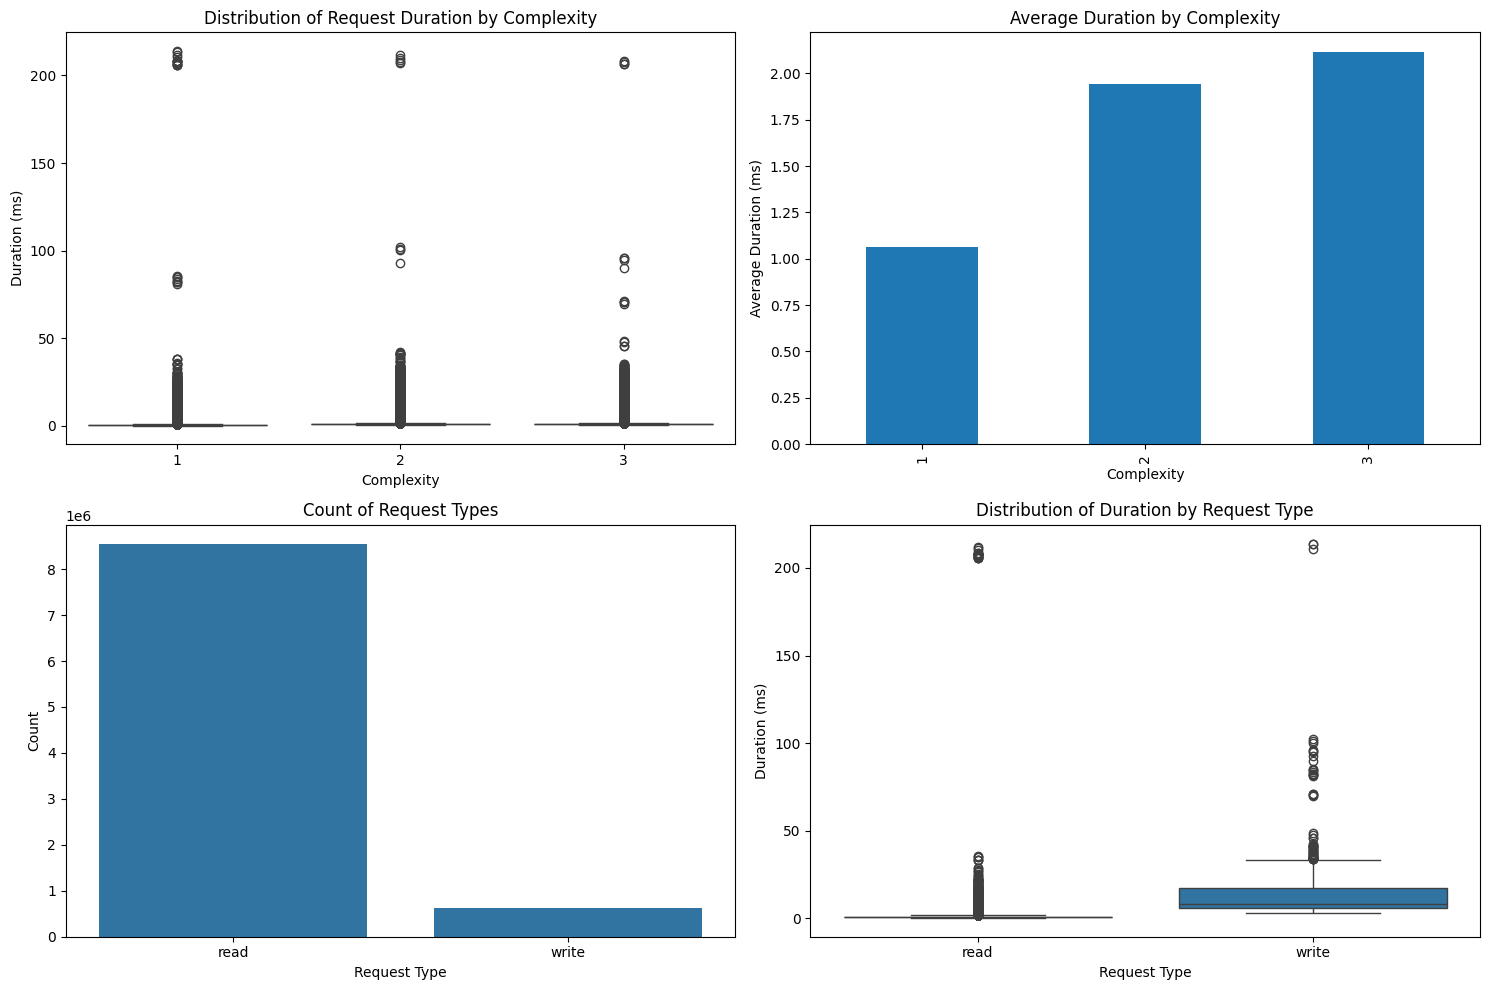

In [17]:
# Data Analysis and Visualization

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of Request Duration for each Complexity level
plt.subplot(2, 2, 1)
sns.boxplot(x='Complexity', y='Duration', data=df)
plt.title('Distribution of Request Duration by Complexity')
plt.ylabel('Duration (ms)')
plt.xlabel('Complexity')

# Plot 2: Average Duration for each Complexity level
plt.subplot(2, 2, 2)
df.groupby('Complexity')['Duration'].mean().plot(kind='bar')
plt.title('Average Duration by Complexity')
plt.ylabel('Average Duration (ms)')
plt.xlabel('Complexity')

# Plot 3: Count of Request Types
plt.subplot(2, 2, 3)
sns.countplot(x='RequestType', data=df)
plt.title('Count of Request Types')
plt.xlabel('Request Type')
plt.ylabel('Count')

# Plot 4: Distribution of Duration for each Request Type
plt.subplot(2, 2, 4)
sns.boxplot(x='RequestType', y='Duration', data=df)
plt.title('Distribution of Duration by Request Type')
plt.ylabel('Duration (ms)')
plt.xlabel('Request Type')

# Display the plots
plt.tight_layout()
plt.show()


In [18]:
# Statistical Analysis

# Descriptive statistics for Duration
duration_stats = df['Duration'].describe()

# Correlation between Complexity and Duration
correlation_complexity_duration = df['Complexity'].corr(df['Duration'])

# ANOVA test to see if the means of Duration for each Complexity level are significantly different
anova = stats.f_oneway(df[df['Complexity'] == 1]['Duration'],
                       df[df['Complexity'] == 2]['Duration'],
                       df[df['Complexity'] == 3]['Duration'])

duration_stats, correlation_complexity_duration, anova


(count    9.164258e+06
 mean     1.558483e+00
 std      3.114622e+00
 min      2.582400e-01
 25%      5.549270e-01
 50%      8.620395e-01
 75%      1.084190e+00
 max      2.138691e+02
 Name: Duration, dtype: float64,
 0.14714328771425195,
 F_onewayResult(statistic=112940.94344553877, pvalue=0.0))

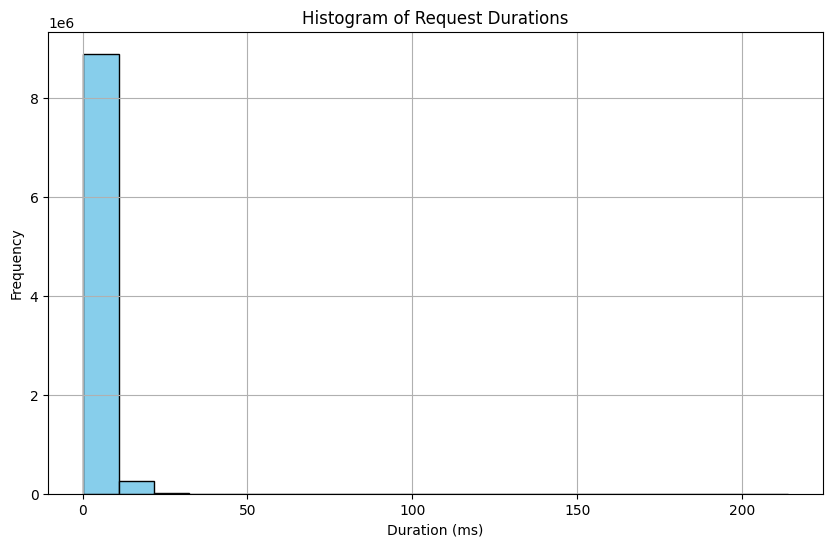

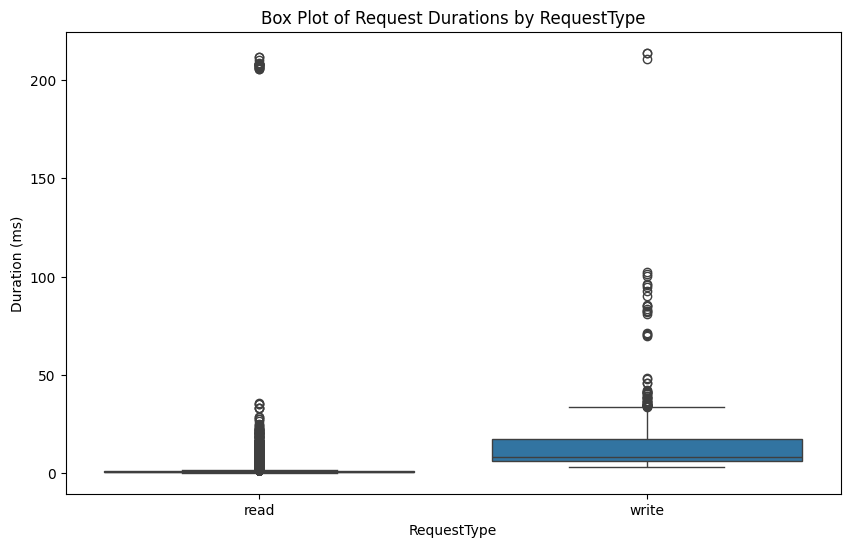

C:\Users\alicx\AppData\Local\Temp\ipykernel_20516\3721539317.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Duration'], shade=True, color='orange')


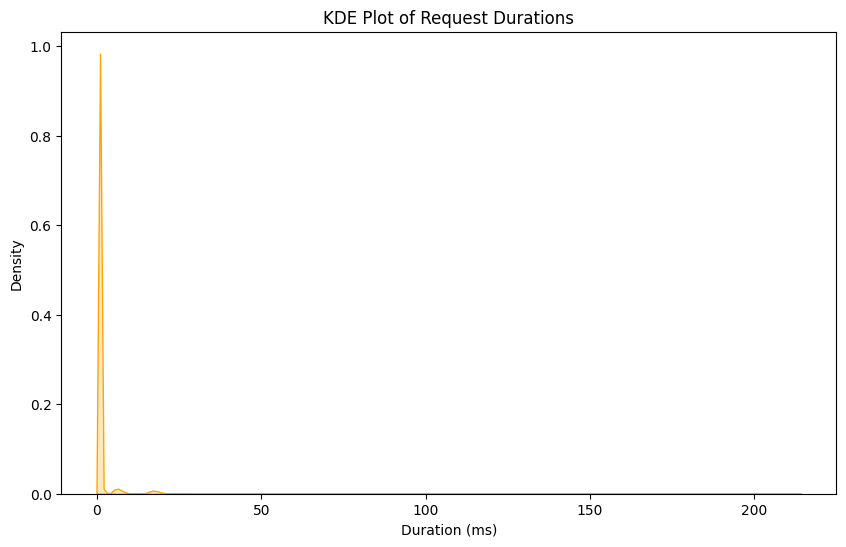

In [19]:

# Plotting
# Histogram of request durations
plt.figure(figsize=(10, 6))
plt.hist(df['Duration'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Request Durations')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# KDE plot of request durations
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Duration'], shade=True, color='orange')
plt.title('KDE Plot of Request Durations')
plt.xlabel('Duration (ms)')
plt.ylabel('Density')
plt.show()


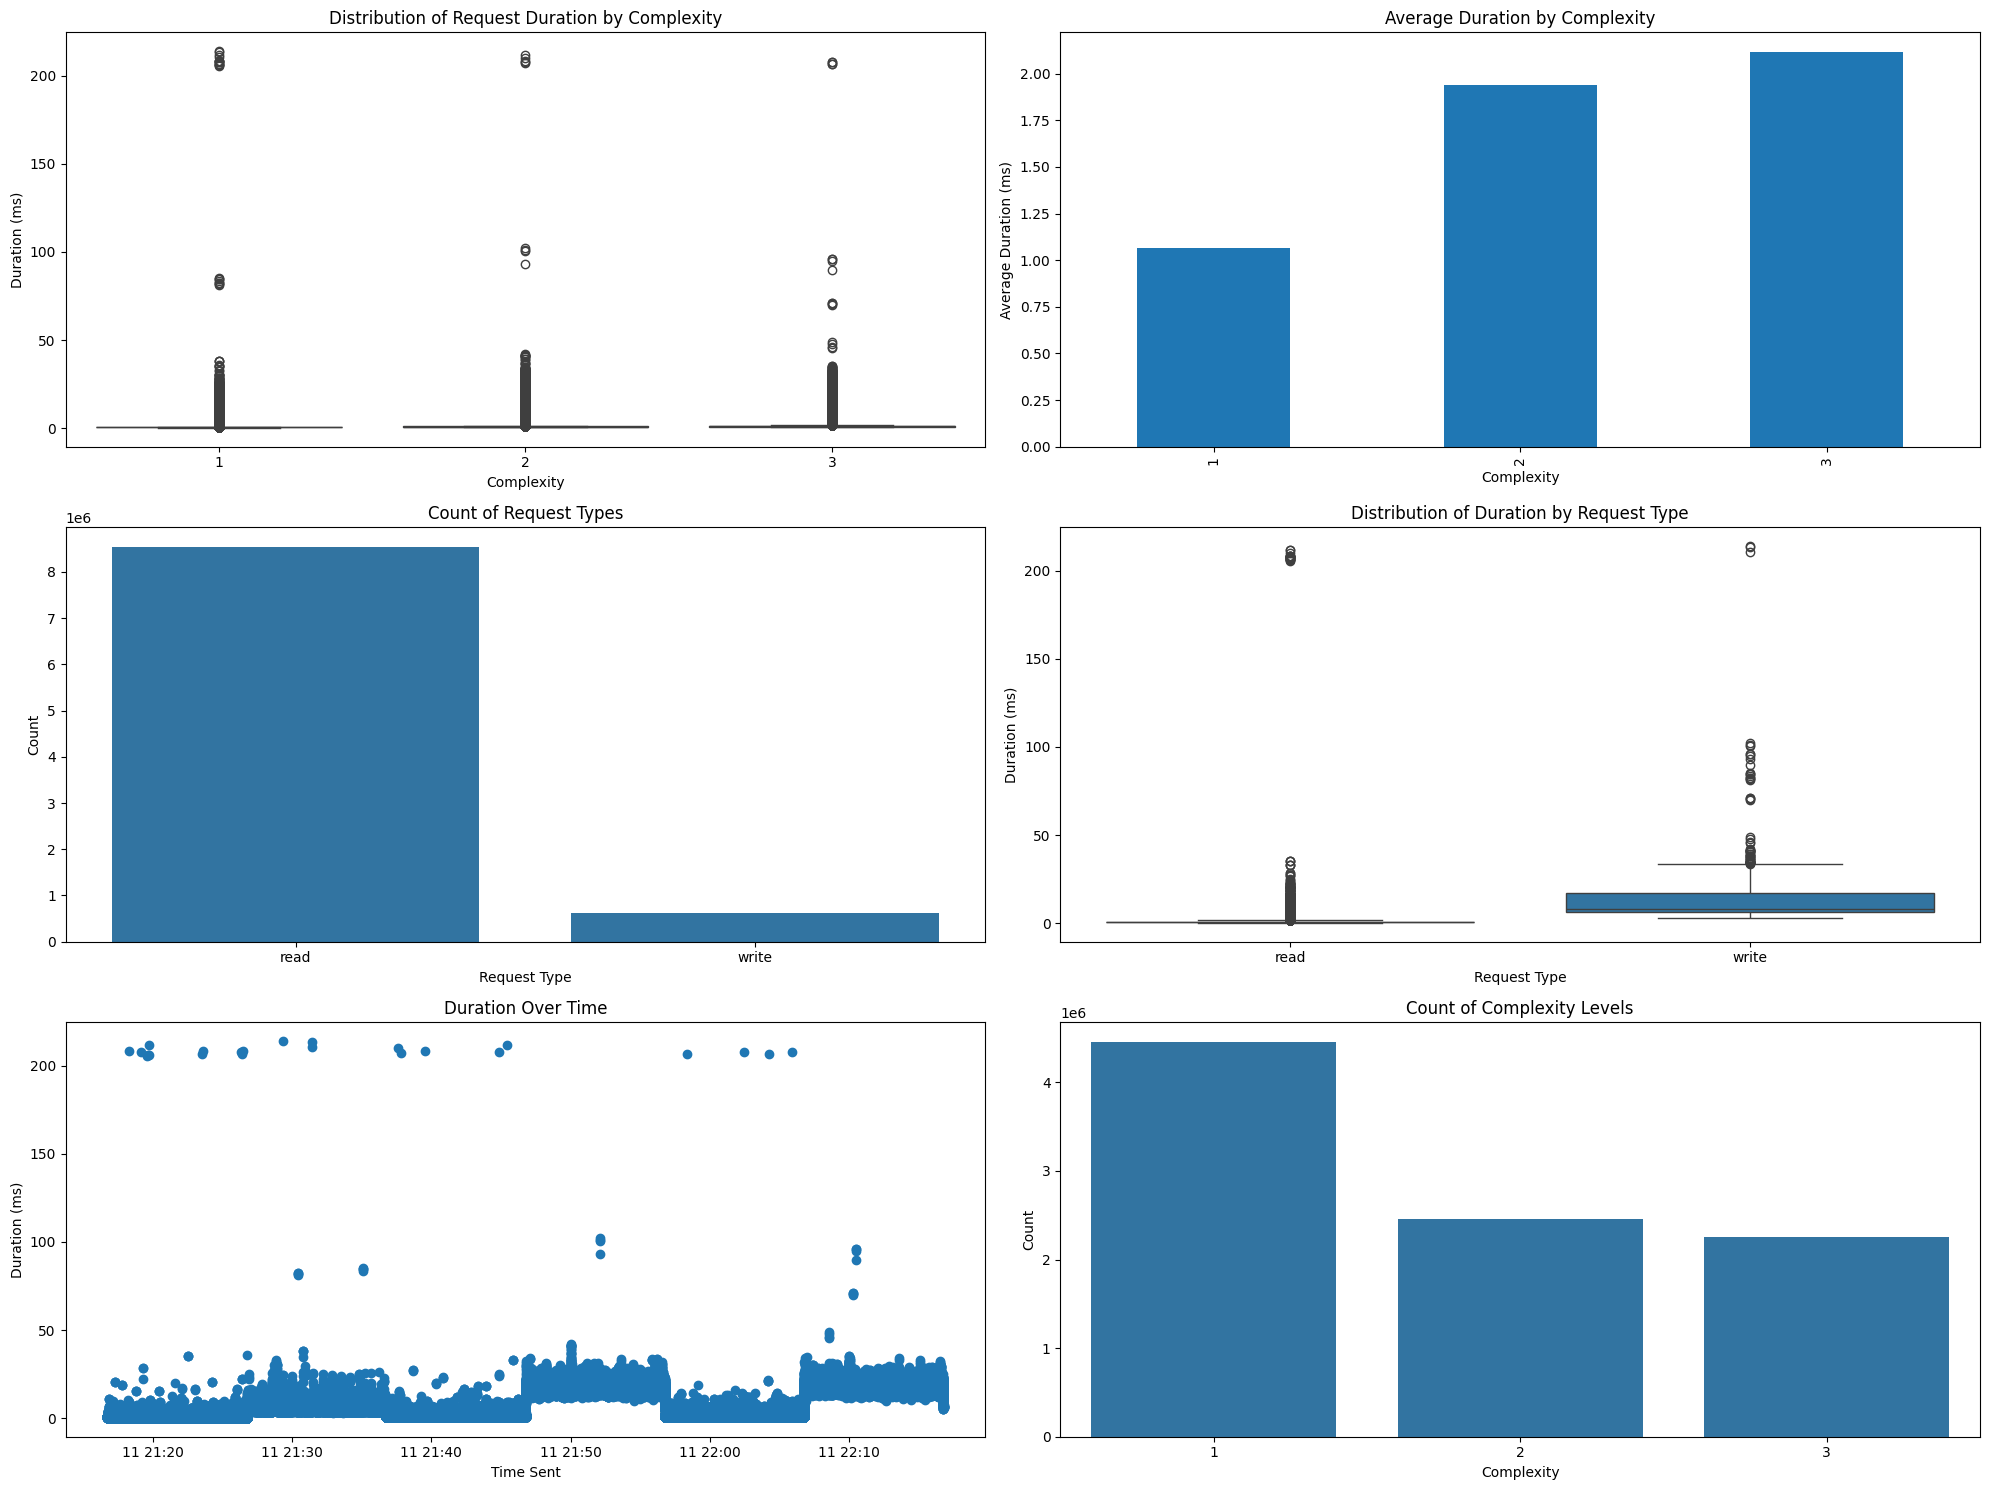

In [20]:

# Set up the matplotlib figure with more plots
plt.figure(figsize=(20, 15))


# Plot: Average Duration for each Complexity level
plt.subplot(3, 2, 2)
df.groupby('Complexity')['Duration'].mean().plot(kind='bar')
plt.title('Average Duration by Complexity')
plt.ylabel('Average Duration (ms)')
plt.xlabel('Complexity')

# Plot: Duration Over Time
plt.subplot(3, 2, 5)
plt.plot(df['TimeSent'], df['Duration'], marker='o', linestyle='')
plt.title('Duration Over Time')
plt.xlabel('Time Sent')
plt.ylabel('Duration (ms)')

# Plot: Complexity Counts
plt.subplot(3, 2, 6)
sns.countplot(x='Complexity', data=df)
plt.title('Count of Complexity Levels')
plt.xlabel('Complexity')
plt.ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()
